# Approximate function table

Approximate function tables can be used to speed-up code at an often small hit numerical precision. The basic idea is to replace a function $f(x)$ with an array, such that the values $x$ can easily be mapped to values of the array.

Consider the following example:

Populating the interactive namespace from numpy and matplotlib


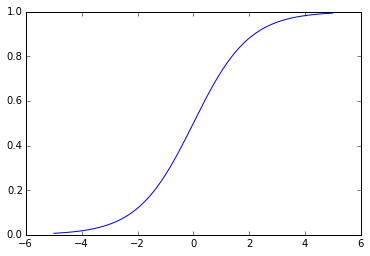

In [6]:
%pylab inline
import pylab as pl, numpy as np
xs = pl.arange(-5,5,0.01)
pl.plot(xs, 1./(1.+np.exp(-xs)))

It's well known that exp is a pretty slow function.

In order to apply this trick it will be convenient to only need to worry about the function over finite range. This requires some special knowledge of function. For example, the sigmoid function is 0 for large negative numbers and 1 for large positive numbers. Another good example are periodic functions like sin and cos.

Note that even this plot is a numerical approximation to the actual function.

I recently used an approximation to $\text{logadd}(x,y)=\log(\exp(x) + \exp(y))$ and found that my finite difference gradient tests no longer worked as they used to.

I came up with the follow tweak: use a piecewise linear approximation, instead of piecewise constant. 

 * This avoid problems with how to round up or down. 

 * The approximation function is sub-differentiable everywhere. 
 
 * Slightly slower to compute because we have a few more operations per lookup.

How good does the approximation need to be? Depends on your use case.

robot coins example

gradient descent for logistic regression